### Data Analysis of BaseBall teams - Hariyalee Patel

##### Import primary libraries 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm2
import warnings

##### import dataset from your computer to here / Read .csv file:- 

In [3]:
df = pd.read_csv('baseball_teams.csv')

##### To get total number of Columns and Rows:-

In [4]:
df.shape

(2805, 43)

##### To see the Standard Deviation, Mean, Count and more... :- 

In [5]:
df.describe()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,2805.000000,2805.000000,2805.00000,2406.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,...,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2488.000000,2805.000000
mean,1955.036720,4.107308,150.34795,78.465919,74.749020,74.749020,681.945811,5142.492335,1346.273440,227.624955,...,9.664171,23.667736,4022.383244,1346.083779,101.136542,474.010695,731.229234,186.337255,140.186495,0.961519
std,41.519083,2.323414,23.22725,4.698684,17.640402,17.378079,135.738244,750.551691,219.891603,58.692602,...,5.097328,16.281300,630.996942,219.521064,58.245002,131.890032,296.409881,107.657444,29.322764,0.030224
min,1871.000000,1.000000,6.00000,44.000000,0.000000,4.000000,24.000000,211.000000,33.000000,3.000000,...,0.000000,0.000000,162.000000,49.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.760000
25%,1919.000000,2.000000,153.00000,77.000000,66.000000,65.000000,613.000000,5127.000000,1299.000000,193.000000,...,6.000000,9.000000,4077.000000,1288.000000,46.000000,427.000000,501.000000,116.000000,126.000000,0.960000
50%,1963.000000,4.000000,157.00000,81.000000,77.000000,76.000000,690.000000,5389.000000,1393.000000,231.000000,...,9.000000,24.000000,4236.000000,1392.000000,109.000000,494.000000,735.000000,145.000000,145.000000,0.970000
75%,1992.000000,6.000000,162.00000,81.000000,87.000000,87.000000,763.000000,5517.000000,1467.000000,270.000000,...,13.000000,38.000000,4341.000000,1470.000000,148.000000,555.000000,965.000000,217.000000,159.250000,0.980000
max,2015.000000,13.000000,165.00000,84.000000,116.000000,134.000000,1220.000000,5781.000000,1783.000000,376.000000,...,32.000000,68.000000,4518.000000,1993.000000,241.000000,827.000000,1450.000000,639.000000,217.000000,0.991000


#### To check the name of columns:- 

In [6]:
df.columns

Index(['Year', 'League', 'Team', 'Franchise ', 'Division', 'Final_Standing',
       'Games_Played', 'Unnamed: 7', 'Games_Won', 'Games_Lost', 'Unnamed: 10',
       'Unnamed: 11', 'League_Win', 'World_Series', 'Runs_Scored', 'At_Bats',
       'Hits', 'Doubles', 'Triples', 'Home_Runs', 'Walks', 'Strike_Outs',
       'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly',
       'Runs_Against', 'Earned_Runs', 'Earned_Run_Average', 'Complete_Games',
       'Shutout', 'Saves', 'Infield_Put_Outs', 'Hits_Allowed',
       'Home_Run_Allowed', 'Walks_Allowed', 'Strikeouts_Allowed', 'Errors',
       'Double_Plays', 'Fielding_Percentage', 'Team_Name', 'Home_Ball_Park',
       'Attendance'],
      dtype='object')

##### To check datatypes of each Variables :- 

In [7]:
df.dtypes

Year                     int64
League                  object
Team                    object
Franchise               object
Division                object
Final_Standing           int64
Games_Played             int64
Unnamed: 7             float64
Games_Won                int64
Games_Lost               int64
Unnamed: 10             object
Unnamed: 11             object
League_Win              object
World_Series            object
Runs_Scored              int64
At_Bats                  int64
Hits                     int64
Doubles                  int64
Triples                  int64
Home_Runs                int64
Walks                    int64
Strike_Outs            float64
Stolen_Bases           float64
Caught_Stealing        float64
Hit_By_Pitch           float64
Sacrifice_Fly          float64
Runs_Against             int64
Earned_Runs              int64
Earned_Run_Average     float64
Complete_Games           int64
Shutout                  int64
Saves                    int64
Infield_

##### To print information about the DataFrame like number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values):- 

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 2805 non-null   int64  
 1   League               2755 non-null   object 
 2   Team                 2805 non-null   object 
 3   Franchise            2805 non-null   object 
 4   Division             1288 non-null   object 
 5   Final_Standing       2805 non-null   int64  
 6   Games_Played         2805 non-null   int64  
 7   Unnamed: 7           2406 non-null   float64
 8   Games_Won            2805 non-null   int64  
 9   Games_Lost           2805 non-null   int64  
 10  Unnamed: 10          1260 non-null   object 
 11  Unnamed: 11          624 non-null    object 
 12  League_Win           2777 non-null   object 
 13  World_Series         2448 non-null   object 
 14  Runs_Scored          2805 non-null   int64  
 15  At_Bats              2805 non-null   i

##### To get the number of missing values ifrom the dataset:- 

In [92]:
print(df.isnull().sum())

Year                      0
League                   50
Team                      0
Franchise                 0
Division               1517
Final_Standing            0
Games_Played              0
Unnamed: 7              399
Games_Won                 0
Games_Lost                0
Unnamed: 10            1545
Unnamed: 11            2181
League_Win               28
World_Series            357
Runs_Scored               0
At_Bats                   0
Hits                      0
Doubles                   0
Triples                   0
Home_Runs                 0
Walks                     0
Strike_Outs               0
Stolen_Bases              0
Caught_Stealing           0
Hit_By_Pitch              0
Sacrifice_Fly             0
Runs_Against              0
Earned_Runs               0
Earned_Run_Average        0
Complete_Games            0
Shutout                   0
Saves                     0
Infield_Put_Outs          0
Hits_Allowed              0
Home_Run_Allowed          0
Walks_Allowed       

##### To get information about a DataFrame including the index dtype and columns, non-null values and memory usage:- 

In [87]:
mean_value = df[['Strike_Outs', 'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly', 'Double_Plays']].mean()

In [88]:
df.loc[:, ['Strike_Outs', 'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly', 'Double_Plays']] = df.loc[:, ['Strike_Outs', 'Stolen_Bases', 'Caught_Stealing', 'Hit_By_Pitch', 'Sacrifice_Fly', 'Double_Plays']].fillna(value=mean_value)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 2805 non-null   int64  
 1   League               2755 non-null   object 
 2   Team                 2805 non-null   object 
 3   Franchise            2805 non-null   object 
 4   Division             1288 non-null   object 
 5   Final_Standing       2805 non-null   int64  
 6   Games_Played         2805 non-null   int64  
 7   Unnamed: 7           2406 non-null   float64
 8   Games_Won            2805 non-null   int64  
 9   Games_Lost           2805 non-null   int64  
 10  Unnamed: 10          1260 non-null   object 
 11  Unnamed: 11          624 non-null    object 
 12  League_Win           2777 non-null   object 
 13  World_Series         2448 non-null   object 
 14  Runs_Scored          2805 non-null   int64  
 15  At_Bats              2805 non-null   i

##### To get the correlation analysis:-  

In [93]:
df.corr(method='pearson',numeric_only='False')

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.293981,0.601304,0.341956,0.418790,0.425112,0.273367,0.605436,0.506059,0.683101,...,0.095318,0.897888,0.617324,0.507877,0.884038,0.572311,0.879181,-0.833145,0.419725,0.777934
Final_Standing,-0.293981,1.000000,-0.171295,-0.085398,-0.732510,0.502550,-0.447966,-0.199481,-0.306493,-0.364275,...,-0.380173,-0.403732,-0.202563,0.046543,-0.173527,0.013765,-0.346624,0.308794,-0.026202,-0.298955
Games_Played,0.601304,-0.171295,1.000000,0.963764,0.676371,0.661355,0.532620,0.986522,0.867794,0.679297,...,0.351139,0.525381,0.996585,0.858471,0.549978,0.776006,0.641185,-0.494665,0.378708,0.859709
Unnamed: 7,0.341956,-0.085398,0.963764,1.000000,0.358841,0.295313,0.353552,0.904329,0.547261,0.379173,...,0.121658,0.408410,0.951415,0.519463,0.408671,0.370675,0.490309,-0.208608,0.406277,0.319166
Games_Won,0.418790,-0.732510,0.676371,0.358841,1.000000,-0.102111,0.677243,0.689233,0.725160,0.586949,...,0.545568,0.505623,0.697276,0.413214,0.320302,0.380921,0.518630,-0.430352,0.240419,0.644387
Games_Lost,0.425112,0.502550,0.661355,0.295313,-0.102111,1.000000,0.028576,0.632149,0.436382,0.339586,...,-0.090116,0.232377,0.637079,0.741285,0.453769,0.667285,0.364530,-0.267573,0.284231,0.521540
Runs_Scored,0.273367,-0.447966,0.532620,0.353552,0.677243,0.028576,1.000000,0.618912,0.801701,0.692903,...,-0.005953,0.301986,0.519478,0.594606,0.387560,0.468324,0.307831,-0.131307,0.383230,0.411579
At_Bats,0.605436,-0.199481,0.986522,0.904329,0.689233,0.632149,0.618912,1.000000,0.919542,0.736695,...,0.295969,0.531993,0.984474,0.884420,0.578579,0.777466,0.633544,-0.480204,0.424589,0.845304
Hits,0.506059,-0.306493,0.867794,0.547261,0.725160,0.436382,0.801701,0.919542,1.000000,0.817653,...,0.188116,0.454741,0.862981,0.867496,0.515793,0.698237,0.489808,-0.433909,0.428291,0.759347
Doubles,0.683101,-0.364275,0.679297,0.379173,0.586949,0.339586,0.692903,0.736695,0.817653,1.000000,...,0.051027,0.609095,0.680553,0.722018,0.662841,0.595325,0.615098,-0.569944,0.421987,0.711360


 #### Period 1 (>1920), Dataframe 1(df1) :- 

In [12]:
df1=df[(df['Year']<1920)]

In [13]:
df1.describe()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,703.000000,703.000000,703.000000,304.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,...,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,386.000000,703.000000
mean,1897.237553,4.913229,127.769559,75.167763,62.758179,62.758179,612.795164,4373.335704,1133.233286,161.051209,...,9.206259,3.889047,3388.967283,1132.671408,23.510669,339.305832,423.809388,338.177809,92.435233,0.923329
std,13.698282,2.722102,35.340280,5.009708,23.223088,22.548362,190.125631,1089.714978,300.714850,49.703023,...,6.688116,4.488248,941.005032,295.743322,14.391141,162.417190,192.278883,107.792039,25.674126,0.039173
min,1871.000000,1.000000,6.000000,52.000000,0.000000,4.000000,24.000000,211.000000,33.000000,3.000000,...,0.000000,0.000000,162.000000,49.000000,0.000000,0.000000,0.000000,47.000000,18.000000,0.760000
25%,1886.000000,3.000000,116.000000,73.000000,49.000000,48.000000,500.500000,4108.500000,1038.000000,138.000000,...,4.000000,0.000000,3097.500000,1019.500000,13.000000,244.500000,299.500000,255.000000,79.250000,0.900000
50%,1898.000000,5.000000,139.000000,77.000000,66.000000,64.000000,614.000000,4816.000000,1228.000000,167.000000,...,8.000000,2.000000,3654.000000,1226.000000,22.000000,379.000000,461.000000,321.000000,96.000000,0.930000
75%,1909.500000,7.000000,154.000000,78.000000,80.000000,78.000000,739.000000,5067.500000,1320.000000,193.500000,...,13.000000,6.000000,4099.500000,1313.500000,33.000000,456.500000,559.000000,419.000000,110.000000,0.950000
max,1919.000000,13.000000,162.000000,84.000000,116.000000,134.000000,1220.000000,5485.000000,1732.000000,277.000000,...,32.000000,22.000000,4401.000000,1844.000000,89.000000,827.000000,895.000000,639.000000,153.000000,0.970000


##### pearson method used to get standard correlation coefficient:- 

In [94]:
df1.corr(method='pearson',numeric_only='False')

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.082193,0.802923,0.039266,0.602368,0.620393,0.170307,0.735271,0.655431,0.562873,...,0.627117,0.676590,0.821519,0.664930,0.230242,0.679998,0.676153,-0.549536,0.785223,0.878291
Final_Standing,-0.082193,1.000000,-0.108053,-0.091165,-0.635882,0.489376,-0.335152,-0.131851,-0.225380,-0.311365,...,-0.462850,-0.277237,-0.136902,0.121449,0.159822,0.095441,-0.242680,0.186997,0.087461,-0.234411
Games_Played,0.802923,-0.108053,1.000000,0.889232,0.765999,0.745224,0.564020,0.987764,0.905877,0.760180,...,0.553754,0.481929,0.997586,0.900834,0.464565,0.834464,0.798978,-0.087397,0.764035,0.880804
Unnamed: 7,0.039266,-0.091165,0.889232,1.000000,0.303142,0.137983,0.123811,0.800200,0.307485,0.120461,...,0.311831,0.248635,0.882112,0.244269,0.015318,0.301987,0.577207,0.087324,0.211687,0.140322
Games_Won,0.602368,-0.635882,0.765999,0.303142,1.000000,0.144745,0.681313,0.775265,0.808361,0.749308,...,0.673471,0.526227,0.779830,0.555890,0.243336,0.532710,0.695112,-0.199159,0.497300,0.752685
Games_Lost,0.620393,0.489376,0.745224,0.137983,0.144745,1.000000,0.160974,0.716733,0.558298,0.397839,...,0.156623,0.202158,0.727625,0.811717,0.464053,0.732441,0.506540,0.065033,0.544475,0.580469
Runs_Scored,0.170307,-0.335152,0.564020,0.123811,0.681313,0.160974,1.000000,0.659766,0.809644,0.756382,...,0.067464,0.140634,0.544808,0.632833,0.558037,0.556296,0.334195,0.333870,0.484396,0.395619
At_Bats,0.735271,-0.131851,0.987764,0.800200,0.775265,0.716733,0.659766,1.000000,0.946003,0.802197,...,0.490849,0.427719,0.983225,0.918925,0.510169,0.830906,0.760765,0.004864,0.765141,0.848008
Hits,0.655431,-0.225380,0.905877,0.307485,0.808361,0.558298,0.809644,0.946003,1.000000,0.875189,...,0.393214,0.406667,0.898052,0.896290,0.541807,0.788433,0.631432,0.003521,0.730875,0.790960
Doubles,0.562873,-0.311365,0.760180,0.120461,0.749308,0.397839,0.756382,0.802197,0.875189,1.000000,...,0.355533,0.389172,0.756859,0.753645,0.494058,0.654073,0.587034,0.004483,0.582737,0.685504


In [95]:
off_def=['Runs_Scored','At_Bats','Hits','Doubles','Triples','Home_Runs','Walks','Strike_Outs','Stolen_Bases','Caught_Stealing','Hit_By_Pitch','Sacrifice_Fly',
'Runs_Against','Earned_Runs','Earned_Run_Average','Complete_Games','Shutout','Saves','Infield_Put_Outs','Hits_Allowed','Home_Run_Allowed','Walks_Allowed','Strikeouts_Allowed','Errors','Double_Plays','Fielding_Percentage']

##### To get top 8 variables from df1 -

In [96]:
df1.corr(method='pearson',numeric_only=True).loc['Games_Won'][off_def].sort_values(ascending=False, key=abs)[:8]

Caught_Stealing        0.883660
Hits                   0.808361
Infield_Put_Outs       0.779830
At_Bats                0.775265
Fielding_Percentage    0.752685
Doubles                0.749308
Walks                  0.712184
Strikeouts_Allowed     0.695112
Name: Games_Won, dtype: float64

##### Period 2 (1920 - 1959), Dataframe 2(df2) :-

In [97]:
df2=df[(df['Year']>=1920)&(df['Year']<1959)]

In [98]:
df2.describe()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,...,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000,624.000000
mean,1939.000000,4.479167,154.314103,77.157051,76.657051,76.657051,714.424679,5315.203526,1441.554487,243.285256,...,9.525641,15.230769,4129.000000,1441.274038,87.987179,516.155449,537.067308,170.613782,150.621795,0.967612
std,11.263658,2.285318,1.505707,1.484326,14.447703,14.322171,108.047285,109.297605,107.497002,38.224252,...,4.349423,6.996304,62.592314,112.815494,33.203538,90.337409,117.976718,33.165520,20.105450,0.005798
min,1920.000000,1.000000,147.000000,70.000000,38.000000,43.000000,394.000000,4898.000000,1174.000000,153.000000,...,1.000000,2.000000,3891.000000,1163.000000,25.000000,257.000000,310.000000,99.000000,94.000000,0.950000
25%,1929.000000,2.000000,154.000000,77.000000,66.000000,66.000000,643.000000,5239.500000,1364.000000,215.750000,...,6.000000,10.000000,4089.000000,1367.000000,63.000000,452.000000,445.500000,147.000000,137.000000,0.960000
50%,1939.000000,4.000000,154.000000,77.000000,78.000000,76.000000,707.500000,5306.000000,1433.500000,240.000000,...,9.000000,14.000000,4131.000000,1434.000000,82.000000,512.500000,526.000000,169.000000,150.000000,0.970000
75%,1949.000000,6.000000,155.000000,78.000000,87.000000,87.000000,778.250000,5383.000000,1512.250000,268.000000,...,12.000000,19.000000,4170.750000,1515.250000,108.250000,578.000000,618.250000,191.250000,164.000000,0.970000
max,1958.000000,8.000000,158.000000,82.000000,111.000000,115.000000,1067.000000,5667.000000,1783.000000,373.000000,...,26.000000,42.000000,4299.000000,1993.000000,187.000000,812.000000,896.000000,294.000000,217.000000,0.980000


In [99]:
df2.corr(method='pearson',numeric_only='False')

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.000561,0.187773,0.095239,0.009203,0.009283,-0.255401,-0.201823,-0.579199,-0.459580,...,0.197733,0.526857,0.148140,-0.548918,0.675809,0.426025,0.708818,-0.693122,0.361087,0.563599
Final_Standing,-0.000561,1.000000,-0.094655,-0.194462,-0.944458,0.943079,-0.607823,-0.227050,-0.404228,-0.264623,...,-0.504508,-0.384499,-0.359083,0.467292,0.120423,0.242202,-0.313724,0.320916,-0.058163,-0.306013
Games_Played,0.187773,-0.094655,1.000000,0.576867,0.122353,-0.060200,0.056384,0.392102,0.034058,0.003377,...,0.116415,0.116224,0.683573,-0.030358,0.117846,0.119133,0.230651,-0.107817,0.116125,0.148567
Unnamed: 7,0.095239,-0.194462,0.576867,1.000000,0.212541,-0.177692,0.107275,0.260312,0.086832,0.070700,...,0.199273,0.067296,0.448297,-0.101921,0.015153,0.008963,0.175938,-0.130983,0.126884,0.153690
Games_Won,0.009203,-0.944458,0.122353,0.212541,1.000000,-0.996321,0.633883,0.237114,0.413347,0.264535,...,0.530373,0.412007,0.397806,-0.498431,-0.123852,-0.255384,0.346984,-0.348327,0.061420,0.324973
Games_Lost,0.009283,0.943079,-0.060200,-0.177692,-0.996321,1.000000,-0.634312,-0.218212,-0.414882,-0.269011,...,-0.526597,-0.402038,-0.355533,0.497424,0.142282,0.263750,-0.327303,0.340441,-0.046757,-0.315295
Runs_Scored,-0.255401,-0.607823,0.056384,0.107275,0.633883,-0.634312,1.000000,0.521852,0.805296,0.645750,...,-0.011662,0.192697,0.045733,0.161396,0.049222,0.009019,0.070107,0.009221,0.035037,-0.030382
At_Bats,-0.201823,-0.227050,0.392102,0.260312,0.237114,-0.218212,0.521852,1.000000,0.702629,0.534066,...,-0.077865,-0.045457,0.431098,0.316953,-0.014872,-0.053994,-0.006446,0.150966,0.013290,-0.086646
Hits,-0.579199,-0.404228,0.034058,0.086832,0.413347,-0.414882,0.805296,0.702629,1.000000,0.732333,...,-0.120487,-0.082965,0.051179,0.419898,-0.217787,-0.226795,-0.237770,0.313584,-0.109585,-0.255801
Doubles,-0.459580,-0.264623,0.003377,0.070700,0.264535,-0.269011,0.645750,0.534066,0.732333,1.000000,...,-0.159830,-0.128584,-0.042005,0.418941,-0.192061,-0.084754,-0.210997,0.257892,-0.088170,-0.215509


### Top 8 Variables to find from df2 -

In [100]:
df2.corr(method='pearson',numeric_only=True).loc['Games_Won'][off_def].sort_values(ascending=False, key=abs)[:8]

Runs_Scored           0.633883
Runs_Against         -0.632395
Earned_Run_Average   -0.622357
Earned_Runs          -0.609230
Shutout               0.530373
Hits_Allowed         -0.498431
Hits                  0.413347
Saves                 0.412007
Name: Games_Won, dtype: float64

##### Period 3(1960-1989), Dataframe 3(df3) :- 

In [22]:
df3=df[(df['Year']>=1960)&(df['Year']<1989)]

In [23]:
df3.describe()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,...,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000,678.000000
mean,1974.952802,4.060472,159.286136,79.643068,79.541298,79.541298,665.259587,5408.231563,1380.017699,223.644543,...,11.122419,32.488201,4284.697640,1380.076696,126.210914,513.941003,856.454277,136.349558,149.209440,0.973097
std,8.167603,2.239210,10.603537,5.369868,12.819756,12.747887,94.704128,372.362791,127.759709,33.828993,...,4.592210,9.255714,286.305089,126.198573,29.288027,76.655396,132.783907,22.005846,20.253353,0.004784
min,1960.000000,1.000000,103.000000,47.000000,37.000000,42.000000,329.000000,3493.000000,797.000000,119.000000,...,1.000000,10.000000,2767.000000,827.000000,40.000000,268.000000,388.000000,65.000000,74.000000,0.960000
25%,1968.000000,2.000000,161.000000,81.000000,71.000000,71.000000,612.000000,5410.000000,1327.000000,202.000000,...,8.000000,25.250000,4302.000000,1329.000000,105.250000,469.000000,775.250000,122.250000,137.000000,0.970000
50%,1975.000000,4.000000,162.000000,81.000000,81.000000,79.000000,673.000000,5489.500000,1395.000000,223.000000,...,11.000000,32.000000,4345.500000,1399.000000,126.000000,511.000000,866.000000,136.000000,150.000000,0.970000
75%,1982.000000,6.000000,162.000000,81.000000,89.000000,88.000000,729.000000,5546.000000,1458.000000,248.000000,...,14.000000,39.000000,4383.000000,1456.000000,145.000000,565.000000,937.000000,150.000000,162.000000,0.980000
max,1988.000000,10.000000,165.000000,84.000000,109.000000,120.000000,896.000000,5767.000000,1633.000000,320.000000,...,30.000000,64.000000,4518.000000,1636.000000,226.000000,770.000000,1221.000000,210.000000,215.000000,0.980000


In [24]:
df3.corr(method='pearson',numeric_only='False')

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.225985,-0.103337,-0.102026,-0.038832,-0.039051,0.123500,-0.065018,0.119865,0.398739,...,-0.236727,0.247808,-0.111400,0.121694,-0.032160,0.002900,-0.183314,-0.237284,-0.039167,0.208630
Final_Standing,-0.225985,1.000000,0.022724,0.026489,-0.752349,0.771939,-0.438513,-0.030466,-0.276893,-0.278873,...,-0.327229,-0.401180,-0.028216,0.223014,0.220013,0.267633,-0.040948,0.303890,0.015028,-0.265697
Games_Played,-0.103337,0.022724,1.000000,0.986877,0.419862,0.411640,0.517861,0.974049,0.728832,0.430477,...,0.134420,0.217303,0.988740,0.731456,0.397062,0.452790,0.536654,0.439297,0.456284,-0.058552
Unnamed: 7,-0.102026,0.026489,0.986877,1.000000,0.408798,0.411491,0.508217,0.960355,0.715028,0.420387,...,0.130979,0.210268,0.975905,0.727754,0.398502,0.453638,0.530567,0.434045,0.450226,-0.060396
Games_Won,-0.038832,-0.752349,0.419862,0.408798,1.000000,-0.653611,0.677972,0.464663,0.582773,0.422006,...,0.450653,0.507155,0.469873,0.049474,0.000030,-0.156217,0.354762,-0.134957,0.170943,0.249344
Games_Lost,-0.039051,0.771939,0.411640,0.411491,-0.653611,1.000000,-0.248408,0.344977,0.022938,-0.060621,...,-0.342018,-0.325266,0.351925,0.561029,0.330626,0.536507,0.089233,0.498784,0.209105,-0.295882
Runs_Scored,0.123500,-0.438513,0.517861,0.508217,0.677972,-0.248408,1.000000,0.623264,0.848569,0.710231,...,-0.075423,0.383867,0.519268,0.531015,0.492321,0.212012,0.226039,0.054631,0.349168,0.095309
At_Bats,-0.065018,-0.030466,0.974049,0.960355,0.464663,0.344977,0.623264,1.000000,0.839456,0.531810,...,0.100028,0.246101,0.975903,0.764752,0.423657,0.438990,0.510026,0.416284,0.481578,-0.049282
Hits,0.119865,-0.276893,0.728832,0.715028,0.582773,0.022938,0.848569,0.839456,1.000000,0.741248,...,0.007688,0.317441,0.729614,0.695429,0.386697,0.290977,0.289669,0.227247,0.454132,0.017769
Doubles,0.398739,-0.278873,0.430477,0.420387,0.422006,-0.060621,0.710231,0.531810,0.741248,1.000000,...,-0.105480,0.361284,0.423661,0.508051,0.312142,0.181873,0.127434,-0.007684,0.277168,0.124273


##### Top 8 Variables to find from df3 -

In [25]:
df3.corr(method='pearson',numeric_only=True).loc['Games_Won'][off_def].sort_values(ascending=False, key=abs)[:8]

Runs_Scored           0.677972
Hits                  0.582773
Saves                 0.507155
Infield_Put_Outs      0.469873
Earned_Run_Average   -0.469733
At_Bats               0.464663
Shutout               0.450653
Home_Runs             0.438812
Name: Games_Won, dtype: float64

###### Period 41990-2010Dataframe 4(df4) :-

In [26]:
df4=df[(df['Year']>=1990)&(df['Year']<2010)]

In [27]:
df4.describe()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,1999.754325,3.124567,158.771626,79.361592,79.365052,79.365052,749.415225,5443.204152,1442.638408,280.788927,...,8.136678,40.043253,4250.558824,1442.634948,161.759516,537.344291,1010.866782,108.806228,148.723183,0.979974
std,5.710387,1.567118,10.763557,5.492618,12.348912,12.324608,94.213964,371.961748,119.489856,36.119824,...,3.733358,7.874439,289.816707,126.184358,30.978317,74.427875,134.032438,18.939304,20.512148,0.004799
min,1990.000000,1.000000,112.000000,44.000000,43.000000,40.000000,466.000000,3856.000000,963.000000,159.000000,...,0.000000,20.000000,2952.000000,929.000000,76.000000,288.000000,560.000000,57.000000,82.000000,0.970000
25%,1995.000000,2.000000,162.000000,81.000000,71.000000,71.000000,688.250000,5480.250000,1399.250000,262.000000,...,6.000000,35.000000,4297.250000,1385.000000,142.000000,489.000000,929.250000,95.250000,136.000000,0.980000
50%,2000.000000,3.000000,162.000000,81.000000,79.000000,79.000000,747.000000,5535.000000,1454.000000,284.000000,...,8.000000,40.000000,4329.000000,1453.000000,163.000000,537.000000,1015.000000,107.000000,150.000000,0.980000
75%,2005.000000,4.000000,162.000000,81.000000,88.000000,88.000000,809.750000,5601.750000,1511.750000,304.000000,...,11.000000,45.000000,4357.000000,1525.000000,183.000000,584.000000,1096.500000,122.000000,162.000000,0.983000
max,2009.000000,7.000000,163.000000,84.000000,116.000000,119.000000,1009.000000,5781.000000,1684.000000,376.000000,...,24.000000,68.000000,4467.000000,1734.000000,241.000000,784.000000,1404.000000,173.000000,204.000000,0.989000


In [28]:
df4.corr(method='pearson',numeric_only='False')

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
Year,1.000000,-0.107352,0.283988,0.277515,0.124086,0.124330,0.286646,0.313859,0.319450,0.527540,...,0.030275,0.006018,0.263700,0.302516,0.457301,0.087109,0.484901,-0.304833,0.216581,0.602149
Final_Standing,-0.107352,1.000000,0.054707,0.045699,-0.734652,0.784864,-0.427075,0.019478,-0.189215,-0.165760,...,-0.276035,-0.458565,0.010630,0.290372,0.159982,0.309262,-0.266267,0.303055,0.187352,-0.234164
Games_Played,0.283988,0.054707,1.000000,0.980078,0.439008,0.433981,0.473063,0.978408,0.769363,0.528244,...,0.345723,0.380938,0.991931,0.726720,0.344681,0.434202,0.552917,0.301507,0.489225,0.153049
Unnamed: 7,0.277515,0.045699,0.980078,1.000000,0.434521,0.421092,0.467861,0.958905,0.756511,0.519716,...,0.325513,0.378986,0.972855,0.719960,0.346374,0.418510,0.538039,0.284148,0.479078,0.163810
Games_Won,0.124086,-0.734652,0.439008,0.434521,1.000000,-0.618811,0.627709,0.456900,0.554099,0.393862,...,0.533061,0.709256,0.487229,0.012052,-0.111259,-0.146569,0.495095,-0.144582,0.051243,0.272719
Games_Lost,0.124330,0.784864,0.433981,0.421092,-0.618811,1.000000,-0.216235,0.397169,0.116928,0.066509,...,-0.231001,-0.378716,0.378650,0.622535,0.412008,0.526540,-0.012486,0.407927,0.376302,-0.138527
Runs_Scored,0.286646,-0.427075,0.473063,0.467861,0.627709,-0.216235,1.000000,0.577673,0.816475,0.672303,...,0.052452,0.276321,0.473684,0.499458,0.464099,0.239245,0.370264,-0.012506,0.293278,0.213332
At_Bats,0.313859,0.019478,0.978408,0.958905,0.456900,0.397169,0.577673,1.000000,0.863709,0.608516,...,0.300103,0.357336,0.977492,0.763843,0.401862,0.448472,0.553568,0.267144,0.505273,0.178106
Hits,0.319450,-0.189215,0.769363,0.756511,0.554099,0.116928,0.816475,0.863709,1.000000,0.723739,...,0.187956,0.329481,0.767899,0.686279,0.446227,0.351692,0.479361,0.110239,0.441705,0.218516
Doubles,0.527540,-0.165760,0.528244,0.519716,0.393862,0.066509,0.672303,0.608516,0.723739,1.000000,...,0.111875,0.169593,0.519272,0.510009,0.417354,0.223269,0.471160,-0.046379,0.317290,0.346580


##### Top 8 Variables to find from df4 -

In [102]:
df4.corr(method='pearson',numeric_only=True).loc['Games_Won'][off_def].sort_values(ascending=False, key=abs)[:8]

Saves                 0.709256
Runs_Scored           0.627709
Hits                  0.554099
Earned_Run_Average   -0.550992
Walks                 0.537761
Shutout               0.533061
Strikeouts_Allowed    0.495095
Infield_Put_Outs      0.487229
Name: Games_Won, dtype: float64

###### To get the heatmap using  dataframe 4 (df4) :- 

<Axes: >

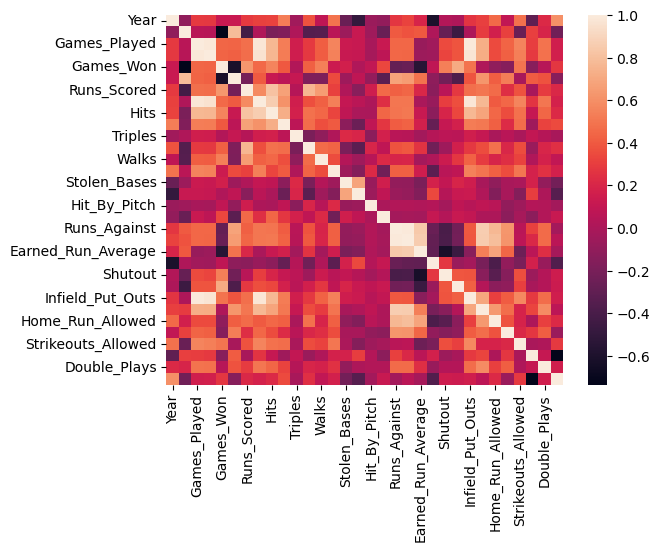

In [103]:
sns.heatmap(df4.corr(method='pearson',numeric_only='True'))

##### To get the descriptive statistics of Period 4 :- 

In [104]:
df4.describe()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,...,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000,578.000000
mean,1999.754325,3.124567,158.771626,79.361592,79.365052,79.365052,749.415225,5443.204152,1442.638408,280.788927,...,8.136678,40.043253,4250.558824,1442.634948,161.759516,537.344291,1010.866782,108.806228,148.723183,0.979974
std,5.710387,1.567118,10.763557,5.492618,12.348912,12.324608,94.213964,371.961748,119.489856,36.119824,...,3.733358,7.874439,289.816707,126.184358,30.978317,74.427875,134.032438,18.939304,20.512148,0.004799
min,1990.000000,1.000000,112.000000,44.000000,43.000000,40.000000,466.000000,3856.000000,963.000000,159.000000,...,0.000000,20.000000,2952.000000,929.000000,76.000000,288.000000,560.000000,57.000000,82.000000,0.970000
25%,1995.000000,2.000000,162.000000,81.000000,71.000000,71.000000,688.250000,5480.250000,1399.250000,262.000000,...,6.000000,35.000000,4297.250000,1385.000000,142.000000,489.000000,929.250000,95.250000,136.000000,0.980000
50%,2000.000000,3.000000,162.000000,81.000000,79.000000,79.000000,747.000000,5535.000000,1454.000000,284.000000,...,8.000000,40.000000,4329.000000,1453.000000,163.000000,537.000000,1015.000000,107.000000,150.000000,0.980000
75%,2005.000000,4.000000,162.000000,81.000000,88.000000,88.000000,809.750000,5601.750000,1511.750000,304.000000,...,11.000000,45.000000,4357.000000,1525.000000,183.000000,584.000000,1096.500000,122.000000,162.000000,0.983000
max,2009.000000,7.000000,163.000000,84.000000,116.000000,119.000000,1009.000000,5781.000000,1684.000000,376.000000,...,24.000000,68.000000,4467.000000,1734.000000,241.000000,784.000000,1404.000000,173.000000,204.000000,0.989000


##### Linear Regression (Histogram & BoxPlot)

##### Histogram of each top 8 variables of Period 4:- 

###### Method  1 to get histogram of "Runs_Scored'  of df4:- 

<Axes: title={'center': 'Runs Scored from 1990 to 2010'}, ylabel='Runs Scored'>

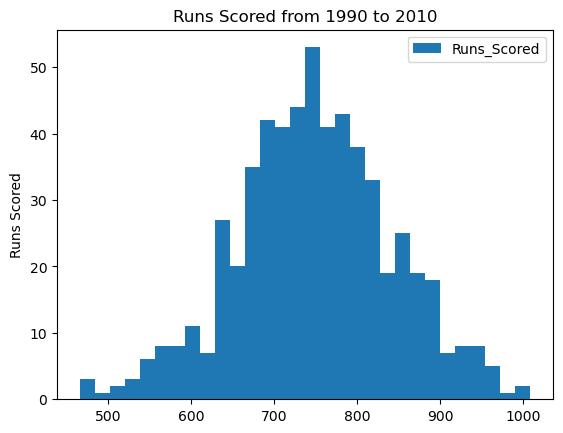

In [107]:
df4.plot(kind='hist', y='Runs_Scored', bins=30 ,ylabel='Runs Scored', title='Runs Scored from 1990 to 2010')

###### Method2 / Design 2, to get histogram of "Hits' from df4:- 

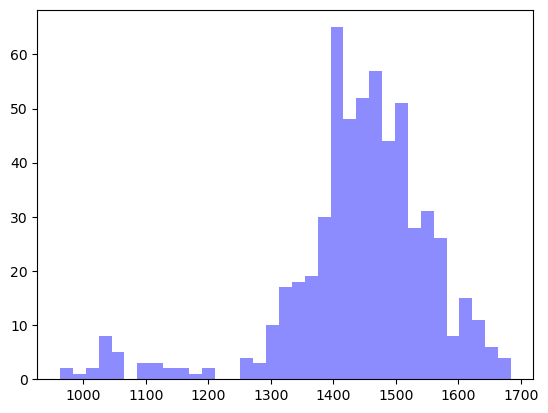

In [109]:
plt.hist(df4['Hits'],bins = 35, 
         alpha = 0.45, color = 'blue') 
plt.show()

###### Method2 / Design 2, to get histogram of  'Walks' from df4:- 

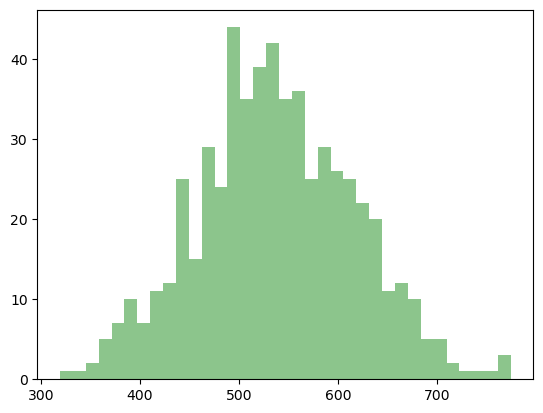

In [110]:
plt.hist(df4['Walks'],bins = 35, 
         alpha = 0.45, color = 'green') 
plt.show()

###### Method2 / Design 2, to get histogram of "Earned_Run_Average' from df4:- 

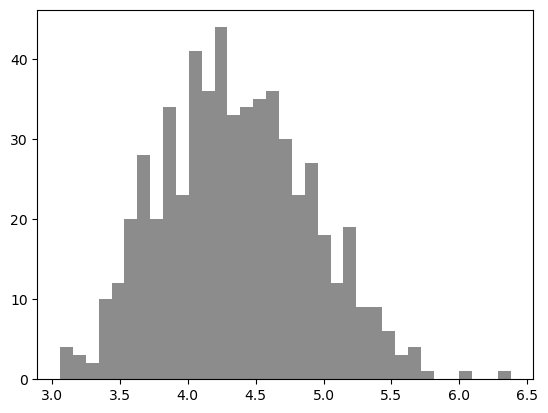

In [111]:
plt.hist(df4['Earned_Run_Average'],bins = 35, 
         alpha = 0.45, color = 'black') 
plt.show()

###### Method2 / Design 2, to get histogram of 'Shutout' from df4:- 

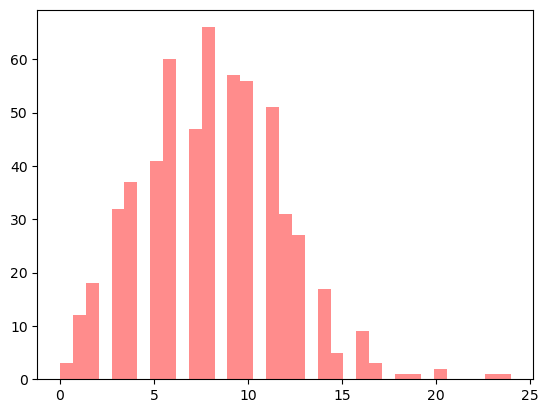

In [112]:
plt.hist(df4['Shutout'],bins = 35, 
         alpha = 0.45, color = 'red') 
plt.show()

###### Method2 / Design 2, to get histogram of 'Saves' from df4:- 

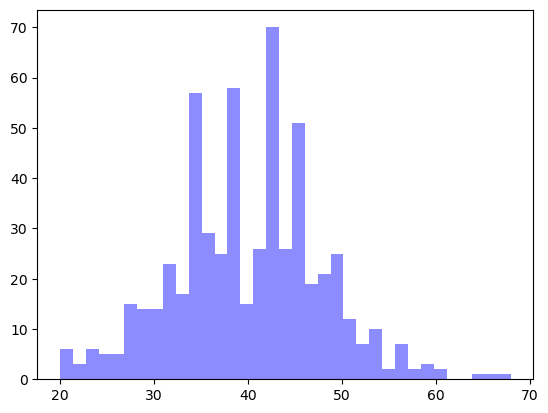

In [113]:
plt.hist(df4['Saves'],bins = 35, 
         alpha = 0.45, color = 'blue') 
plt.show()

###### Method2 / Design 2, to get histogram of 'Infield_Put_Outs' from df4:- 

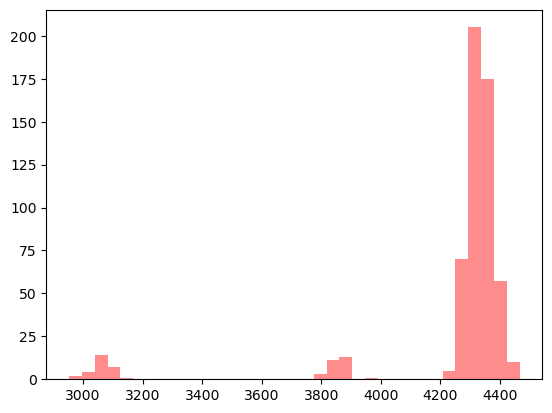

In [114]:
plt.hist(df4['Infield_Put_Outs'],bins = 35, 
         alpha = 0.45, color = 'red') 
plt.show()

###### Method2 / Design 2, to get histogram of 'Strikeouts_Allowed' from df4:- 

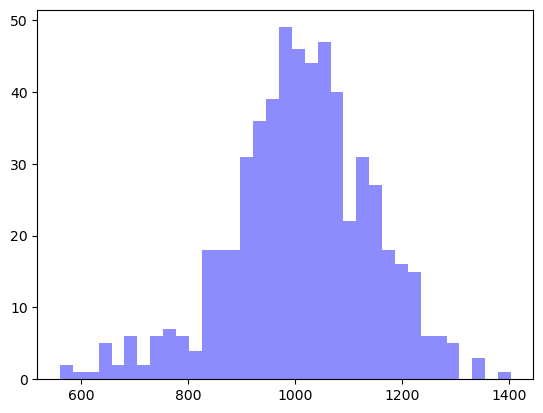

In [115]:
plt.hist(df4['Strikeouts_Allowed'],bins = 35, 
         alpha = 0.45, color = 'blue') 
plt.show()

###### To get Histograms together for all top 8 variables of Period 4  :- 

<Axes: xlabel='Earned_Run_Average', ylabel='Count'>

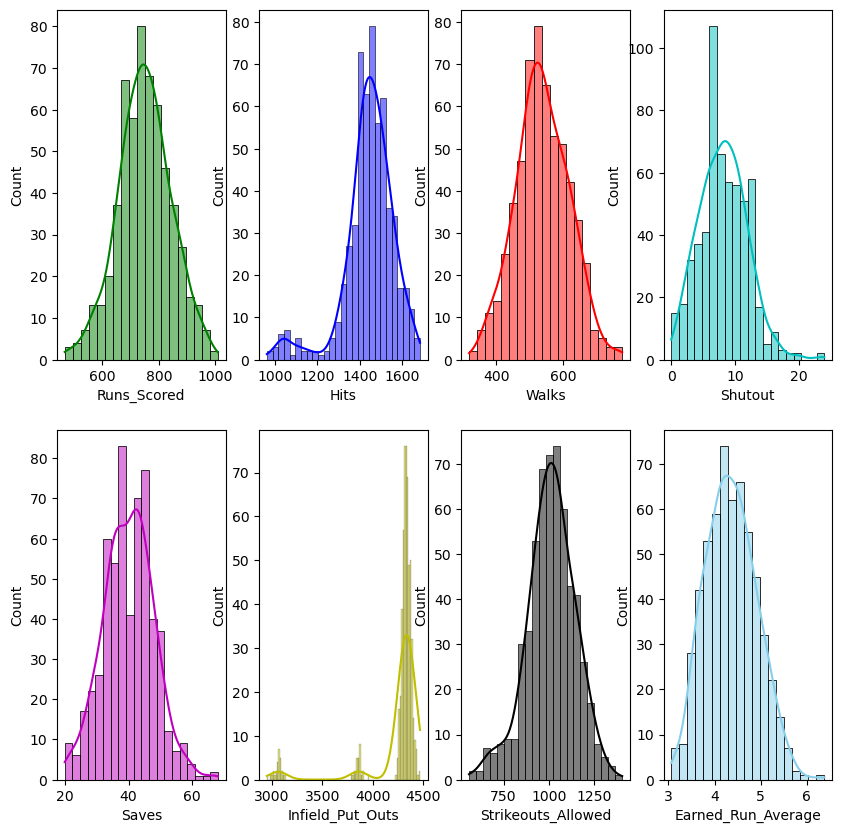

In [116]:
fig, axs=plt.subplots(2,4,figsize=(10,10))

sns.histplot(data=df4,x='Runs_Scored',kde=True,ax=axs[0,0],color='g')

sns.histplot(data=df4,x='Hits',kde=True,ax=axs[0,1],color='b')

sns.histplot(data=df4,x='Walks',kde=True,ax=axs[0,2],color='r')

sns.histplot(data=df4,x='Shutout',kde=True,ax=axs[0,3],color='c')

sns.histplot(data=df4,x='Saves',kde=True,ax=axs[1,0],color='m')

sns.histplot(data=df4,x='Infield_Put_Outs',kde=True,ax=axs[1,1],color='y')

sns.histplot(data=df4,x='Strikeouts_Allowed',kde=True,ax=axs[1,2],color='k')

sns.histplot(data=df4,x='Earned_Run_Average',kde=True,ax=axs[1,3],color='skyblue')

###### To get BoxPlot for each top 8 variables of Period 4:-

##### 'Runs_Scored' BoxPlot:- 

<Axes: >

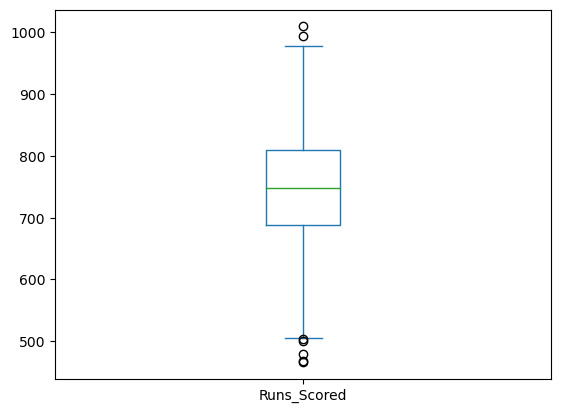

In [117]:
df4['Runs_Scored'].plot(kind='box')

##### 'Hits' BoxPlot:- 

<Axes: >

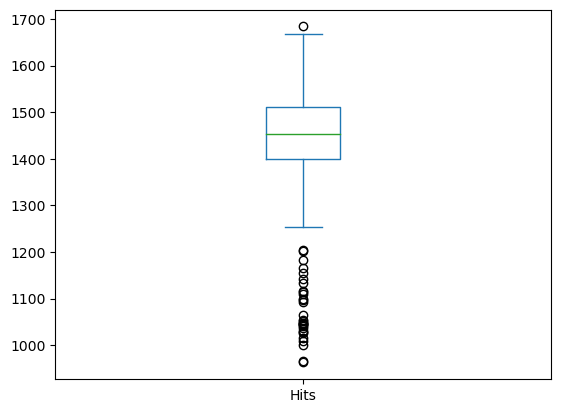

In [118]:
df4['Hits'].plot(kind='box')

##### 'Walks' BoxPlot:- 

<Axes: >

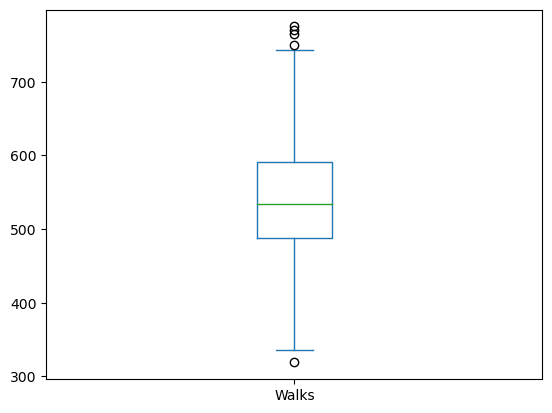

In [44]:
df4['Walks'].plot(kind='box')

##### 'Earned_Run_Average' BoxPlot:- 

<Axes: >

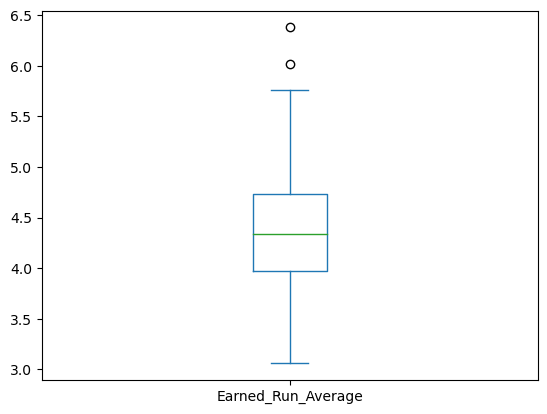

In [119]:
df4['Earned_Run_Average'].plot(kind='box')

##### 'Shutout' BoxPlot:- 

<Axes: >

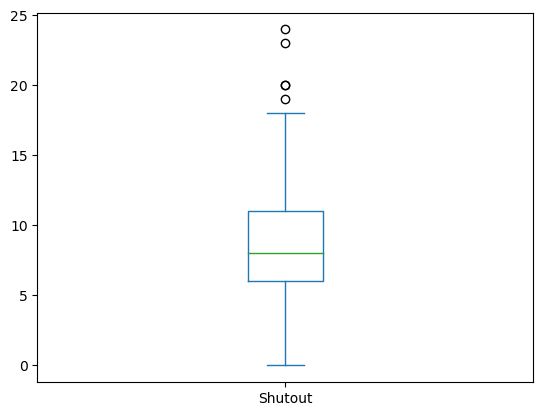

In [120]:
df4['Shutout'].plot(kind='box')

##### 'Saves' BoxPlot:- 

<Axes: >

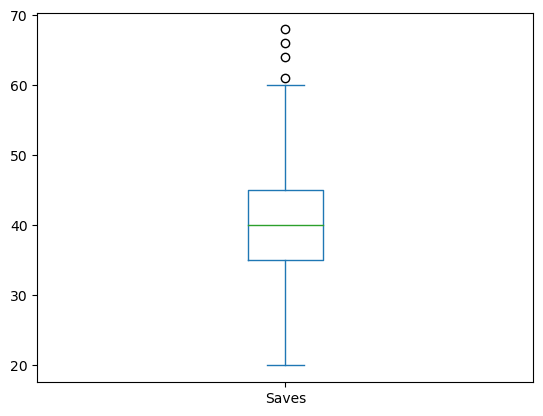

In [121]:
df4['Saves'].plot(kind='box')

##### 'Infield_Put_Outs' BoxPlot:- 

<Axes: >

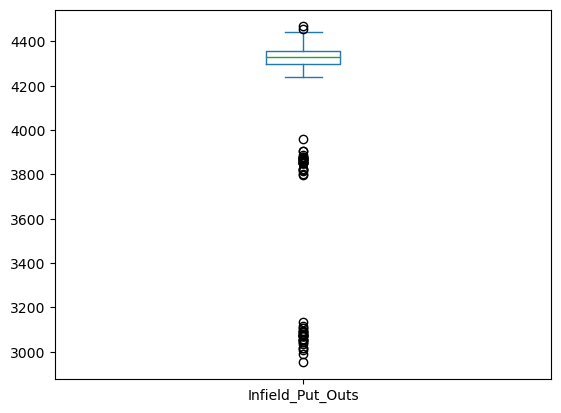

In [123]:
df4['Infield_Put_Outs'].plot(kind='box')

##### 'Strikeouts_Allowed' BoxPlot:- 

<Axes: >

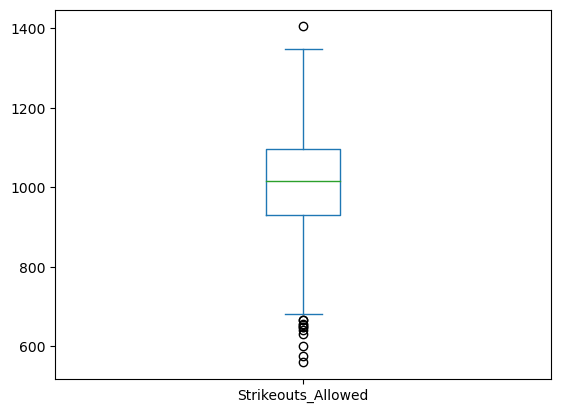

In [124]:
df4['Strikeouts_Allowed'].plot(kind='box')

###### BoxPlot for top 8 variables of Period 4 all together in an one output:- 

<Axes: ylabel='Strikeouts_Allowed'>

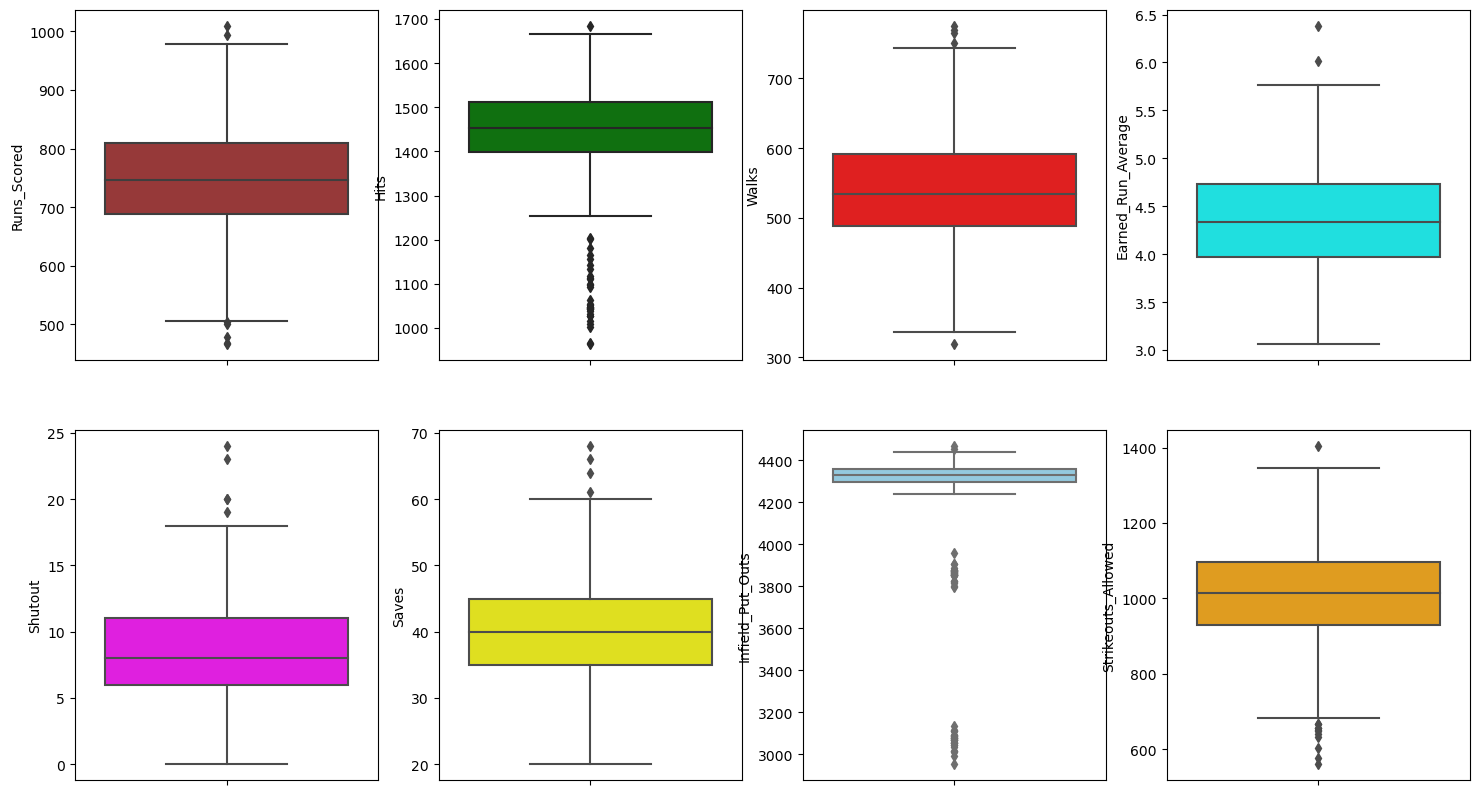

In [125]:
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
sns.boxplot(ax=axes[0, 0], data=df4, y='Runs_Scored', color='brown')
sns.boxplot(ax=axes[0, 1], data=df4,  y='Hits',color='green')
sns.boxplot(ax=axes[0, 2], data=df4,  y='Walks',color='red')
sns.boxplot(ax=axes[0, 3], data=df4, y='Earned_Run_Average',color='cyan')
sns.boxplot(ax=axes[1, 0], data=df4, y='Shutout',color='magenta')
sns.boxplot(ax=axes[1, 1], data=df4,  y='Saves',color='yellow')
sns.boxplot(ax=axes[1, 2], data=df4,  y='Infield_Put_Outs',color='skyblue')
sns.boxplot(ax=axes[1, 3], data=df4,  y='Strikeouts_Allowed',color='orange')

##### Comment on Visual Shape of each Distribution Variable:- 
##### 1.	Runs_Scored:- In my guess, It is Symmetric (Bell Shaped)
##### 2.	Hits :- Skewed Left (negatively skewed)
##### 3.	Walks :- Symmetric (Bell Shaped)
##### 4.	Earned_Run_Average :- Symmetric (Bell Shaped)
##### 5.	Shutout :- Symmetric (Bell Shaped) or Skewed Right
##### 6.	Saves :- Symmetric (Bell Shaped)
##### 7.	Infield_put_outs:- Skewed Left (negatively skewed)
##### 8.	Strikeouts_Allowed :- Symmetric (Bell Shaped)

##### To get paired scattered plots :- 

In [126]:
warnings.filterwarnings("ignore", category=UserWarning)

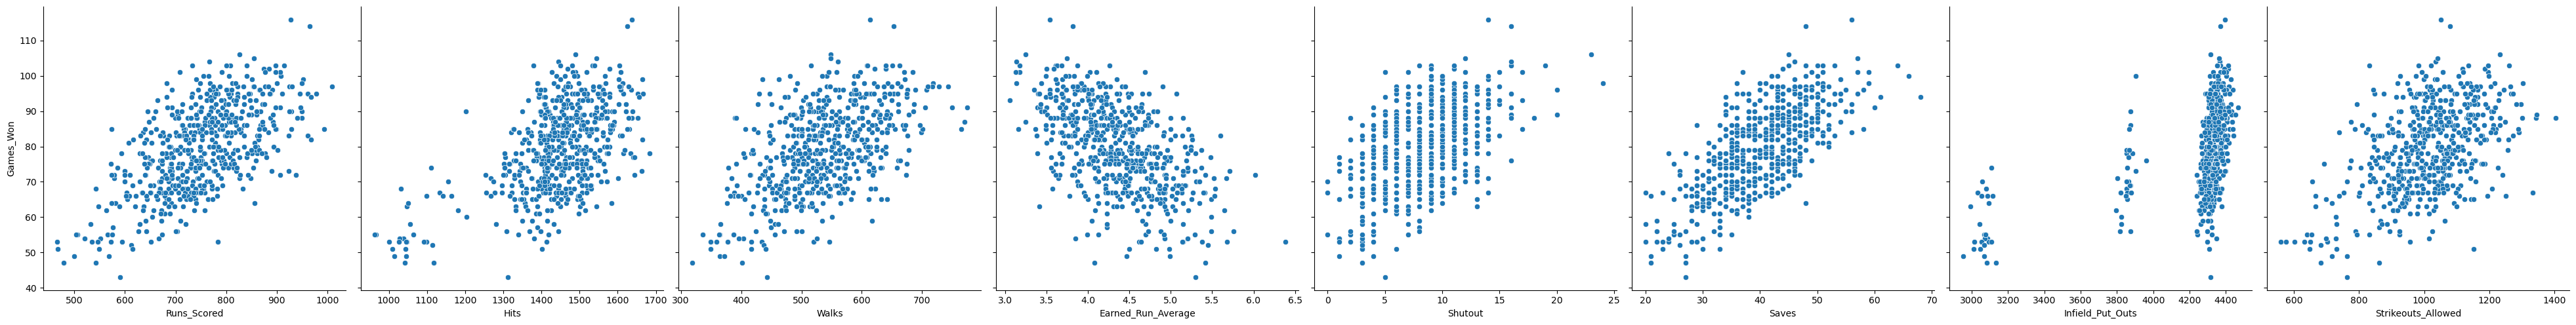

In [127]:
sns.pairplot(df4,x_vars=['Runs_Scored','Hits','Walks','Earned_Run_Average','Shutout','Saves','Infield_Put_Outs','Strikeouts_Allowed'],y_vars='Games_Won',height=5)

In [128]:
warnings.resetwarnings()

##### To get QQ plot of df4 :- 

In [129]:
import pylab 
import scipy.stats as stats

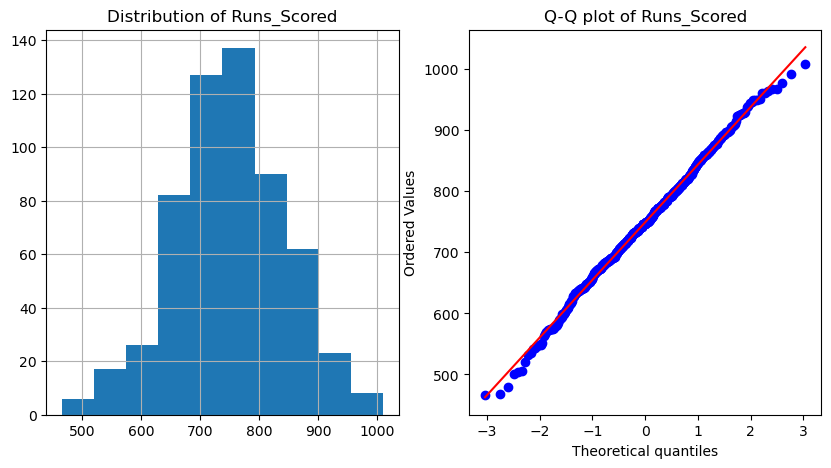

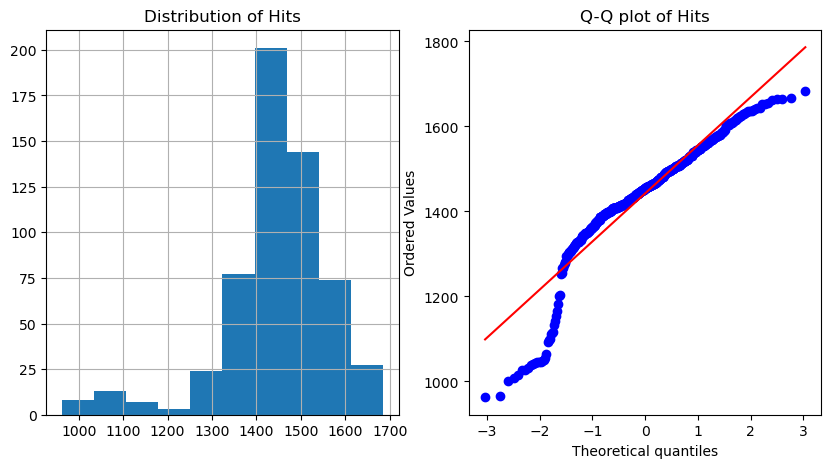

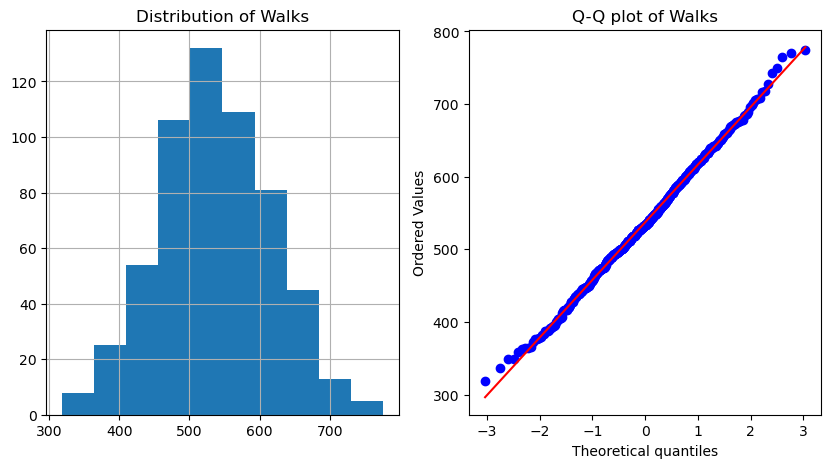

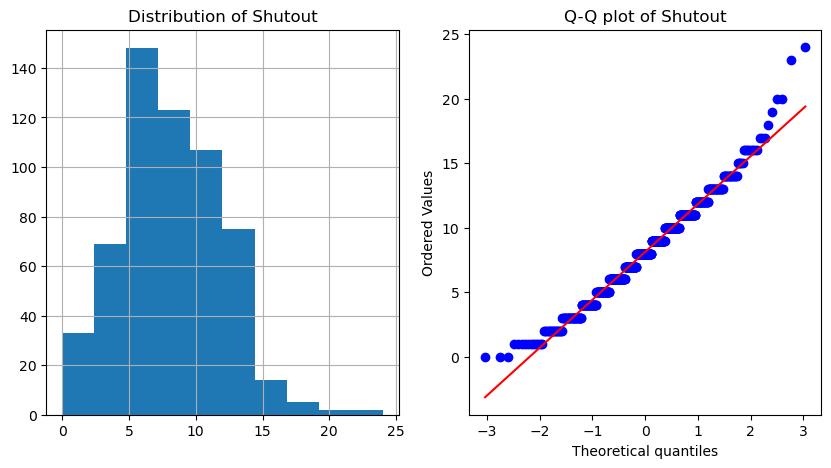

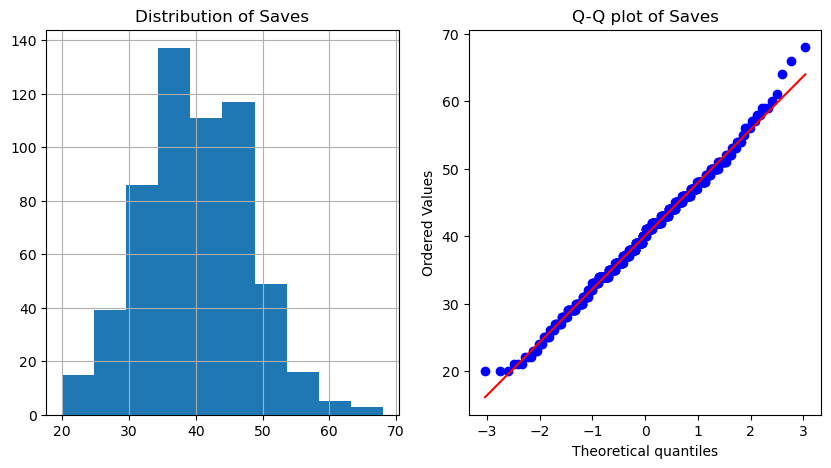

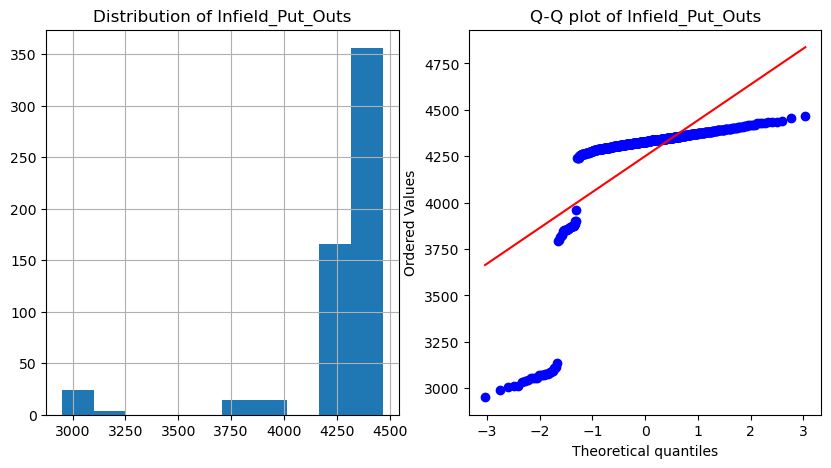

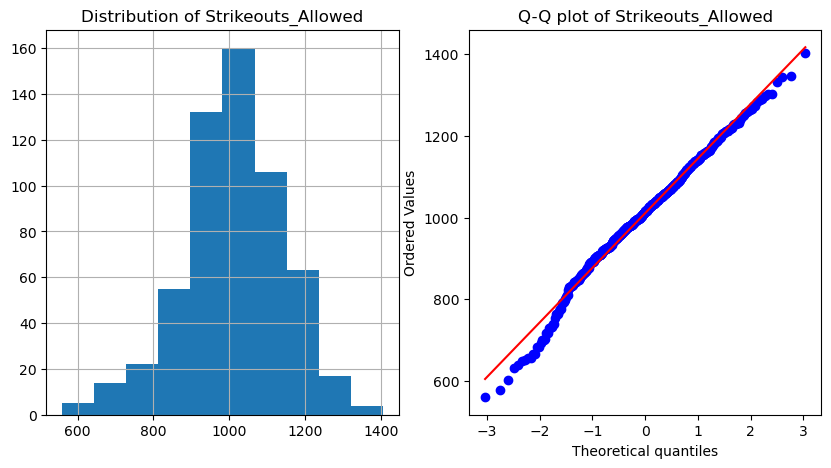

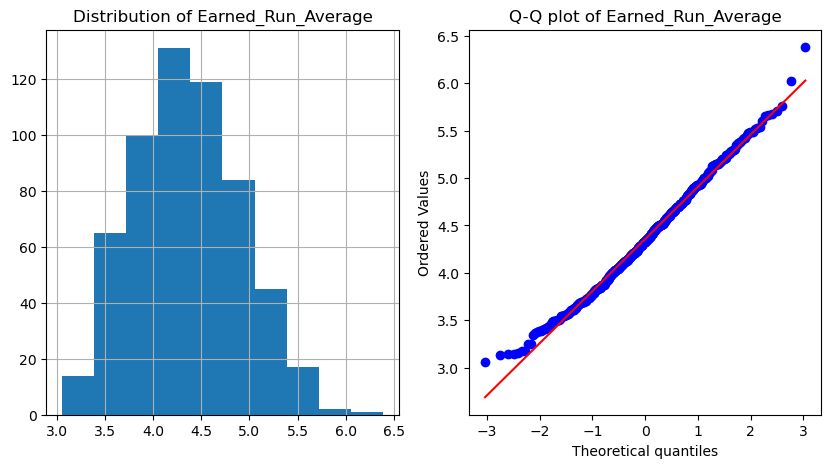

In [130]:
for var in ['Runs_Scored', 'Hits', 'Walks', 'Shutout', 'Saves', 'Infield_Put_Outs','Strikeouts_Allowed','Earned_Run_Average']:
    plt.figure(figsize=(10,5))
 
    plt.subplot(1, 2, 1)
    df4[var].hist()
    plt.title('Distribution of '+ var)
 
    plt.subplot(1, 2, 2)
    stats.probplot(df4[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)
 
    plt.show()

##### Model Validation :-
##### Train/Test data of df4 dataframe(train test split is a model validation process that allows you to simulate how your model would perform with new or unseen data) :-

In [131]:
x_train,x_test,y_train,y_test=train_test_split(df4,df4['Games_Won'],train_size=0.7,random_state=1)

In [132]:
x_train.describe()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,1999.539604,3.175743,158.898515,79.418317,79.163366,79.690594,751.759901,5450.626238,1446.482673,281.349010,...,8.103960,39.883663,4253.821782,1446.331683,162.210396,537.430693,1006.037129,109.804455,148.586634,0.979755
std,5.602721,1.574078,10.393838,5.328025,12.240073,12.393900,95.483252,361.617316,119.168989,36.282042,...,3.755437,7.678647,280.700016,123.530384,31.047035,74.858992,131.230920,19.048427,20.370024,0.004886
min,1990.000000,1.000000,112.000000,44.000000,43.000000,40.000000,466.000000,3861.000000,963.000000,159.000000,...,0.000000,20.000000,2952.000000,929.000000,76.000000,288.000000,560.000000,65.000000,85.000000,0.970000
25%,1995.000000,2.000000,162.000000,81.000000,70.000000,71.000000,687.500000,5481.000000,1399.000000,260.000000,...,6.000000,34.750000,4297.000000,1395.000000,142.750000,489.000000,926.000000,96.000000,134.000000,0.980000
50%,2000.000000,3.000000,162.000000,81.000000,79.000000,79.000000,749.500000,5536.000000,1457.000000,284.000000,...,8.000000,41.000000,4326.500000,1452.500000,163.000000,535.500000,1004.000000,108.000000,149.000000,0.980000
75%,2004.000000,4.000000,162.000000,81.000000,88.000000,88.000000,810.250000,5604.250000,1516.500000,305.000000,...,10.000000,45.000000,4356.250000,1524.250000,183.000000,584.500000,1088.000000,122.000000,162.000000,0.983000
max,2009.000000,7.000000,163.000000,84.000000,116.000000,119.000000,1009.000000,5781.000000,1684.000000,376.000000,...,24.000000,61.000000,4467.000000,1734.000000,241.000000,784.000000,1333.000000,173.000000,204.000000,0.989000


In [133]:
x_test.describe()

,Year,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,Runs_Scored,At_Bats,Hits,Doubles,...,Shutout,Saves,Infield_Put_Outs,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,2000.252874,3.005747,158.477011,79.229885,79.833333,78.609195,743.971264,5425.971264,1433.712644,279.488506,...,8.212644,40.413793,4242.982759,1434.051724,160.712644,537.143678,1022.080460,106.488506,149.040230,0.980483
std,5.939421,1.548809,11.602623,5.870867,12.621242,12.163963,91.236175,395.480865,120.100383,35.810474,...,3.691211,8.322338,310.665079,132.107342,30.881990,73.631146,140.066848,18.530630,20.894273,0.004564
min,1990.000000,1.000000,112.000000,53.000000,47.000000,46.000000,479.000000,3856.000000,966.000000,160.000000,...,1.000000,20.000000,2991.000000,964.000000,90.000000,332.000000,602.000000,57.000000,82.000000,0.970000
25%,1995.000000,2.000000,162.000000,81.000000,71.000000,70.000000,690.000000,5478.250000,1400.000000,264.250000,...,5.000000,36.000000,4302.000000,1373.500000,141.000000,492.500000,932.000000,94.000000,137.250000,0.980000
50%,2001.000000,3.000000,162.000000,81.000000,79.000000,78.500000,743.000000,5533.000000,1447.500000,283.500000,...,8.000000,39.000000,4332.000000,1453.000000,163.000000,543.000000,1036.000000,105.000000,151.000000,0.980000
75%,2005.000000,4.000000,162.000000,81.000000,88.750000,88.000000,807.250000,5595.250000,1506.000000,302.750000,...,11.000000,45.750000,4359.000000,1526.500000,182.750000,584.000000,1115.000000,118.750000,163.000000,0.984000
max,2009.000000,7.000000,163.000000,84.000000,114.000000,106.000000,965.000000,5716.000000,1644.000000,353.000000,...,18.000000,68.000000,4410.000000,1640.000000,239.000000,728.000000,1404.000000,158.000000,192.000000,0.989000


###### To get the Summary of final model:- 

In [134]:
lm1=smf.ols(formula='Games_Won ~ Runs_Scored+Earned_Run_Average+Shutout+Saves', data=df4).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Games_Won   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     1722.
Date:                Tue, 19 Dec 2023   Prob (F-statistic):          1.24e-317
Time:                        01:12:43   Log-Likelihood:                -1530.8
No. Observations:                 578   AIC:                             3072.
Df Residuals:                     573   BIC:                             3093.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             47.6309      2.142     22.234      0.000      43.423      51.838
Runs_Scored            0.0867      0.002     49.455      0.000       0.083       0.090
Earned_Run_Average   -11.7491      0.388    -30.249      0.000     -12.512     -10.986
Shutout                0.2443      0.050      4.838      0.000       0.145       0.344
Saves                  0.3989      0.023     17.536      0.000       0.354       0.444
==============================================================================
Omnibus:                        0.497   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.365
Skew:                           0.048   Prob(JB):                        0.833
Kurtosis:                       3.077   Cond. No.                     1.15e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### To do the model testing :- 

In [135]:
lm1_predict=lm1.predict(x_test)
predict_values=pd.concat([x_test['Games_Won'],lm1_predict],axis=1)
predict_values.columns=['actual_Games_Won','predicted_Games_Won']
predict_values['residual']=predict_values['actual_Games_Won']-predict_values['predicted_Games_Won']
predict_values.head()

,actual_Games_Won,predicted_Games_Won,residual
2239,98,98.077729,-0.077729
2466,86,86.556862,-0.556862
2397,84,85.419498,-1.419498
2457,92,91.598573,0.401427
2527,88,88.178492,-0.178492


In [136]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))
print('Mean Absolute Error', mae)
print('Mean Suare Error ', mse)
print('Root Mean Squared Error', rmse)

Mean Absolute Error 2.624246108829727
Mean Suare Error  10.819095853248406
Root Mean Squared Error 3.289239403456125


###### To get Predictions, MSE,RMSE, MAE of df5 dataframe(New York Yankees) for 2012 year :-

In [137]:
df5=df[(df['Year']==2012)&(df['Team_Name'] == 'New York Yankees')]

In [138]:
df5.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2702,2012,AL,NYA,NYY,E,1,162,81.0,95,67,...,1401,190,431,1318,75,135.0,0.987,New York Yankees,Yankee Stadium III,3542406


In [139]:
lm1_predict=lm1.predict(df5)
predict_values=pd.concat([df5['Games_Won'],lm1_predict],axis=1)
predict_values.columns=['actual_Games_Won','predicted_Games_Won']
predict_values['residual']=predict_values['actual_Games_Won']-predict_values['predicted_Games_Won']
predict_values.head()

,actual_Games_Won,predicted_Games_Won,residual
2702,95,94.770908,0.229092


In [140]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))
print('Mean Absolute Error', mae)
print('Mean Suare Error ', mse)
print('Root Mean Squared Error', rmse)

Mean Absolute Error 0.22909190363127152
Mean Suare Error  0.052483100309399795
Root Mean Squared Error 0.22909190363127152


###### To get Prediction, MSE,RMSE, MAE of df6 dataframe(Toronto Blue Jays) for 2012 year:-

In [141]:
df6=df[(df['Year']==2012)&(df['Team_Name'] == 'Toronto Blue Jays')]

In [142]:
df6.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2713,2012,AL,TOR,TOR,E,4,162,81.0,73,89,...,1439,204,574,1142,101,167.0,0.984,Toronto Blue Jays,Rogers Centre,2099663


In [143]:
lm1_predict=lm1.predict(df6)
predict_values=pd.concat([df6['Games_Won'],lm1_predict],axis=1)
predict_values.columns=['actual_Games_Won','predicted_Games_Won']
predict_values['residual']=predict_values['actual_Games_Won']-predict_values['predicted_Games_Won']
predict_values.head()

,actual_Games_Won,predicted_Games_Won,residual
2713,73,69.453986,3.546014


In [144]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))
print('Mean Absolute Error', mae)
print('Mean Suare Error ', mse)
print('Root Mean Squared Error', rmse)

Mean Absolute Error 3.546013580817828
Mean Suare Error  12.574212315344473
Root Mean Squared Error 3.546013580817828


###### To get Predictions, MSE,RMSE, MAE of df7 dataframe(New York Yankees) for 2015 year:-

In [145]:
df7=df[(df['Year']==2015)&(df['Team_Name'] == 'New York Yankees')]

In [146]:
df7.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2781,2015,AL,NYA,NYY,E,2,162,81.0,87,75,...,1416,182,474,1370,93,135.0,0.985,New York Yankees,Yankee Stadium III,3193795


In [147]:
lm1_predict=lm1.predict(df7)
predict_values=pd.concat([df7['Games_Won'],lm1_predict],axis=1)
predict_values.columns=['actual_Games_Won','predicted_Games_Won']
predict_values['residual']=predict_values['actual_Games_Won']-predict_values['predicted_Games_Won']
predict_values.head()

,actual_Games_Won,predicted_Games_Won,residual
2781,87,86.651881,0.348119


In [149]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))
print('Mean Absolute Error', mae)
print('Mean Suare Error ', mse)
print('Root Mean Squared Error', rmse)

Mean Absolute Error 0.34811948991549
Mean Suare Error  0.12118717925902096
Root Mean Squared Error 0.34811948991549


###### To get Predictions, MSE,RMSE, MAE of df8 dataframe(Toronto Blue Jays) for 2015 year:-

In [150]:
df8=df[(df['Year']==2015)&(df['Team_Name'] == 'Toronto Blue Jays')]

In [151]:
df8.head()

,Year,League,Team,Franchise,Division,Final_Standing,Games_Played,Unnamed: 7,Games_Won,Games_Lost,...,Hits_Allowed,Home_Run_Allowed,Walks_Allowed,Strikeouts_Allowed,Errors,Double_Plays,Fielding_Percentage,Team_Name,Home_Ball_Park,Attendance
2780,2015,AL,TOR,TOR,E,1,162,81.0,93,69,...,1353,173,397,1117,88,145.0,0.985,Toronto Blue Jays,Rogers Centre,2794891


In [152]:
lm1_predict=lm1.predict(df8)
predict_values=pd.concat([df8['Games_Won'],lm1_predict],axis=1)
predict_values.columns=['actual_Games_Won','predicted_Games_Won']
predict_values['residual']=predict_values['actual_Games_Won']-predict_values['predicted_Games_Won']
predict_values.head()

,actual_Games_Won,predicted_Games_Won,residual
2780,93,96.247373,-3.247373


In [153]:
mae=metrics.mean_absolute_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
mse=metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won'])
rmse=np.sqrt(metrics.mean_squared_error(predict_values['actual_Games_Won'], predict_values['predicted_Games_Won']))
print('Mean Absolute Error', mae)
print('Mean Suare Error ', mse)
print('Root Mean Squared Error', rmse)

Mean Absolute Error 3.247372624478146
Mean Suare Error  10.545428962210082
Root Mean Squared Error 3.247372624478146


###### To find an accuracy with percentage :- 

In [154]:
accuracy = 100 - np.mean(rmse)
print('Accuracy is :' , round(accuracy,2), '%')

Accuracy is : 96.75 %
